# Ideas

* feature engineering
    * county (e.g. brooklyn) [here](https://www.kaggle.com/shubh24/two-sigma-connect-rental-listing-inquiries/neighborhood-as-factor-reverse-geocoding) [here](https://www.kaggle.com/luisblanche/two-sigma-connect-rental-listing-inquiries/neighborhoods-instead-of-lat-long)
    * key word extraction from features field
    * image features [example](https://www.kaggle.com/torrinos/two-sigma-connect-rental-listing-inquiries/image-processing-and-sentiment-analysis)

## Good eda links

* [nb](https://www.kaggle.com/sudalairajkumar/two-sigma-connect-rental-listing-inquiries/simple-exploration-notebook-2-connect)

In [70]:
%matplotlib inline
import numpy as np
import pandas as pd
import json
import seaborn as sns
import matplotlib.pylab as plt
from pandasql import sqldf

In [3]:
train_df = pd.read_json("../data/train.json")
test_df = pd.read_json("../data/test.json")
train_test = pd.concat([train_df, test_df], 0)

In [6]:
train_df.columns

Index([u'bathrooms', u'bedrooms', u'building_id', u'created', u'description',
       u'display_address', u'features', u'interest_level', u'latitude',
       u'listing_id', u'longitude', u'manager_id', u'photos', u'price',
       u'street_address'],
      dtype='object')

In [5]:
train_df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [104]:
train_df.iloc[5020]

bathrooms                                                                   1
bedrooms                                                                    3
building_id                                  ce6d18bf3238e668b2bf23f4110b7b67
created                                                   2016-04-04 19:46:30
description                 -----NO FEE, 1 MO FREE-----\r\rThis 3BR has gr...
display_address                                                   John Street
features                    [Common Outdoor Space, Cats Allowed, Dogs Allo...
interest_level                                                            low
latitude                                                              40.7078
listing_id                                                            6822479
longitude                                                             -74.006
manager_id                                   ef20d40b528500037e37b167787ac089
photos                      [https://photos.renthop.com/2/682247

In [19]:
np.sum(train_df.isnull().any(axis=1)) # there are no nulls

0

In [12]:
train_df.listing_id.head()

10        7211212
10000     7150865
100004    6887163
100007    6888711
100013    6934781
Name: listing_id, dtype: int64

# Interest Level

In [30]:
train_df.interest_level.unique()

array([u'medium', u'low', u'high'], dtype=object)

In [32]:
train_df.interest_level.value_counts()

low       34284
medium    11229
high       3839
Name: interest_level, dtype: int64

# Price

In [48]:
train_df.log_price = np.log10(train_df.price)

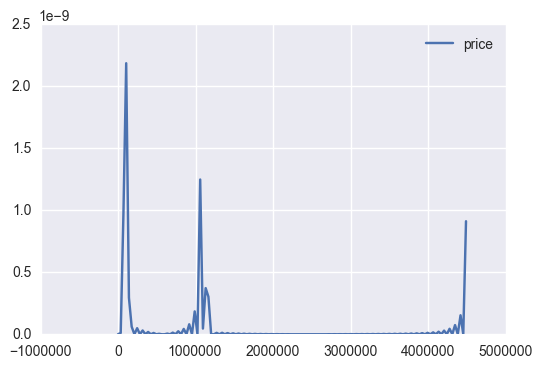

In [49]:
sns.kdeplot(train_df.price)

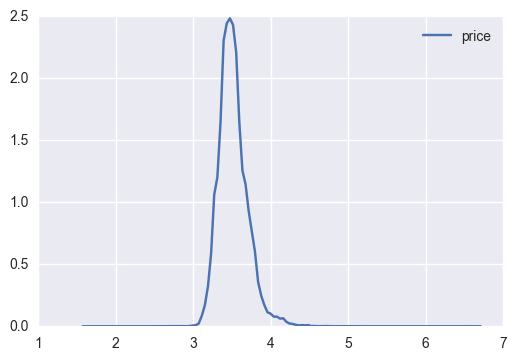

In [50]:
sns.kdeplot(train_df.log_price)

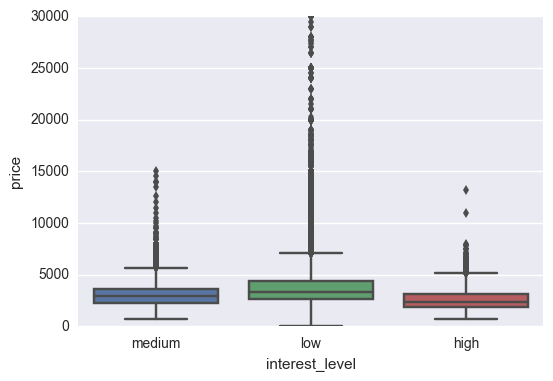

In [51]:
sns.boxplot(x='interest_level', y='price', data=train_df[train_df.price <= 30000])

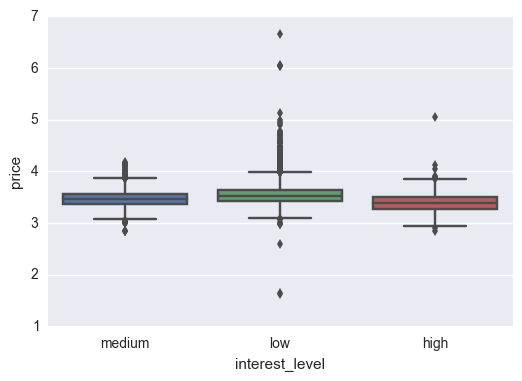

In [52]:
sns.boxplot(x=train_df.interest_level, y=train_df.log_price)

# Features

In [53]:
train_df.features

10                                                       []
10000     [Doorman, Elevator, Fitness Center, Cats Allow...
100004    [Laundry In Building, Dishwasher, Hardwood Flo...
100007                            [Hardwood Floors, No Fee]
100013                                            [Pre-War]
100014                                                   []
100016    [prewar, elevator, Dogs Allowed, Cats Allowed,...
100020    [Doorman, Elevator, Pre-War, Terrace, Laundry ...
100026    [Cats Allowed, Dogs Allowed, Elevator, Laundry...
100027                        [Dishwasher, Hardwood Floors]
100030                                                   []
10004     [prewar, dishwasher, HIGHRISE, ROOFDECK, EAT I...
100044     [Doorman, Elevator, Laundry in Building, No Fee]
100048    [Swimming Pool, Doorman, Fitness Center, No Fe...
10005     [Elevator, Multi-Level, Laundry in Building, D...
100051    [Doorman, Elevator, Fitness Center, Laundry in...
100052                                  

# Bathrooms

In [16]:
train_df.bathrooms.unique()

array([  1.5,   1. ,   2. ,   3.5,   3. ,   2.5,   0. ,   4. ,   4.5,
        10. ,   5. ,   6. ,   6.5,   5.5,   7. ])

# Created

In [55]:
train_df.created.head()

10        2016-06-24 07:54:24
10000     2016-06-12 12:19:27
100004    2016-04-17 03:26:41
100007    2016-04-18 02:22:02
100013    2016-04-28 01:32:41
Name: created, dtype: object

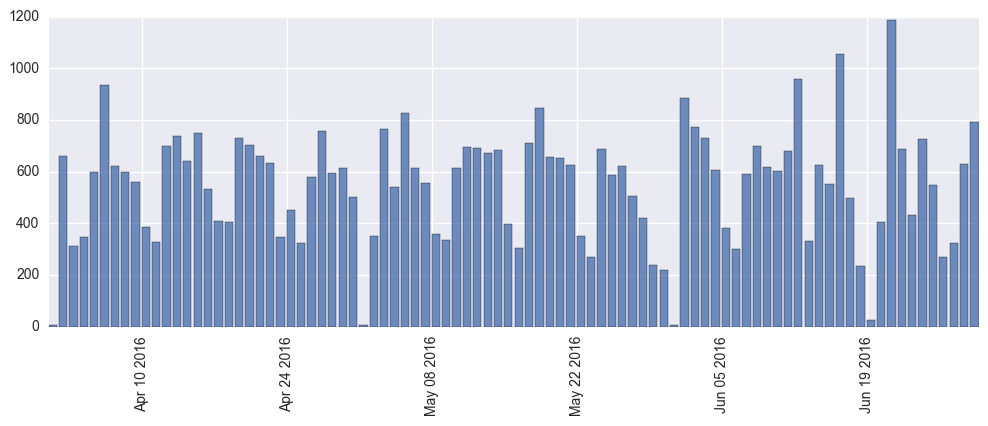

In [65]:
train_df["created"] = pd.to_datetime(train_df["created"])
train_df["date_created"] = train_df["created"].dt.date
cnt_srs = train_df['date_created'].value_counts()

test_df["created"] = pd.to_datetime(test_df["created"])
test_df["date_created"] = test_df["created"].dt.date

plt.figure(figsize=(12,4))
ax = plt.subplot(111)
ax.bar(cnt_srs.index, cnt_srs.values, alpha=0.8)
ax.xaxis_date()
plt.xticks(rotation='vertical')
plt.show()

In [66]:
print train_df.date_created.min()
print train_df.date_created.max()

print test_df.date_created.min()
print test_df.date_created.max()

2016-04-01
2016-06-29
2016-04-01
2016-06-29


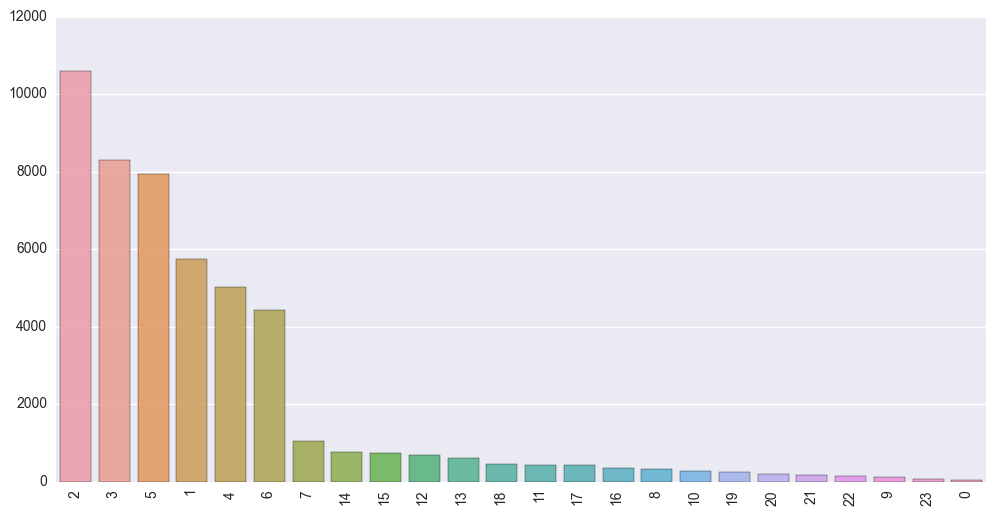

In [68]:
train_df["hour_created"] = train_df["created"].dt.hour
cnt_srs = train_df['hour_created'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.show()

In [97]:
min_date = train_df.date_created.min()
train_df['days_since_beginning'] = train_df.date_created - min_date
train_df['days_since_beginning_int'] = train_df.apply(lambda row: int(row.days_since_beginning.days), axis=1)


